<a href="https://colab.research.google.com/github/extrajp2014/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/DS_Unit_1_Sprint_Challenge_3_Data_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

# Data Storytelling

In this sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

# Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv')
df.rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'}, inplace=True)

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

# Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
1. Use pandas to make a **crosstab** of **`Year`** & **`Occupation`**. ([This documentation](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#cross-tabulations) has examples and explanation.)
2. To get percentages instead of counts, use crosstab's **`normalize`** parameter to normalize over each _row._ ([This documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html) describes the parameter and its options.)
3. You'll know you've calculated the crosstab correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus:** Do insightful data exploration in addition to the crosstab.

In [41]:
pd.set_option('display.height', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

# preview data
print("df columns:")
print(df.columns)
print("")
print("df dtypes:")
print(df.dtypes)
print("")
print("df shape:")
print(df.shape)
print("")
print("df head():")
print(df.head())
print("")
print("df isnull().sum().sum():")
print(df.isnull().sum().sum())
print("")
print("df isnull().sum():")
print(df.isnull().sum())
print("")

df columns:
Index(['Year', 'GoogleKnowlege_Occupation', 'Show', 'Group', 'Guest', 'Occupation'], dtype='object')

df dtypes:
Year                          int64
GoogleKnowlege_Occupation    object
Show                         object
Group                        object
Guest                        object
Occupation                   object
dtype: object

df shape:
(2693, 6)

df head():
   Year GoogleKnowlege_Occupation     Show   Group             Guest              Occupation
0  1999                     actor  1/11/99  Acting    Michael J. Fox  Acting, Comedy & Music
1  1999                  Comedian  1/12/99  Comedy   Sandra Bernhard  Acting, Comedy & Music
2  1999        television actress  1/13/99  Acting     Tracey Ullman  Acting, Comedy & Music
3  1999              film actress  1/14/99  Acting  Gillian Anderson  Acting, Comedy & Music
4  1999                     actor  1/18/99  Acting  David Alan Grier  Acting, Comedy & Music

df isnull().sum().sum():
57

df isnull().sum():
Year 

In [42]:
# Use pandas to make a crosstab of Year & Occupation. (This documentation has examples and explanation.)
# To get percentages instead of counts, use crosstab's normalize parameter to normalize over each row. (This documentation describes the parameter and its options.)
# You'll know you've calculated the crosstab correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.
year_occupation = pd.crosstab(df['Year'], df['Occupation'],normalize='index')

print(year_occupation[(year_occupation.index==1999)])
print("")
print(year_occupation[(year_occupation.index==2015)])
print("")
print("year_occupation columns:")
print(year_occupation.columns)
print("")
print("year_occupation dtypes:")
print(year_occupation.dtypes)
print("")
print("year_occupation shape:")
print(year_occupation.shape)
print("")



Occupation  Acting, Comedy & Music  Government and Politics     Media     Other
Year                                                                           
1999                      0.903614                 0.012048  0.066265  0.018072

Occupation  Acting, Comedy & Music  Government and Politics  Media  Other
Year                                                                     
2015                          0.45                     0.17   0.24   0.14

year_occupation columns:
Index(['Acting, Comedy & Music', 'Government and Politics', 'Media', 'Other'], dtype='object', name='Occupation')

year_occupation dtypes:
Occupation
Acting, Comedy & Music     float64
Government and Politics    float64
Media                      float64
Other                      float64
dtype: object

year_occupation shape:
(17, 4)



# Part 2 — Recreate this explanatory visualization:

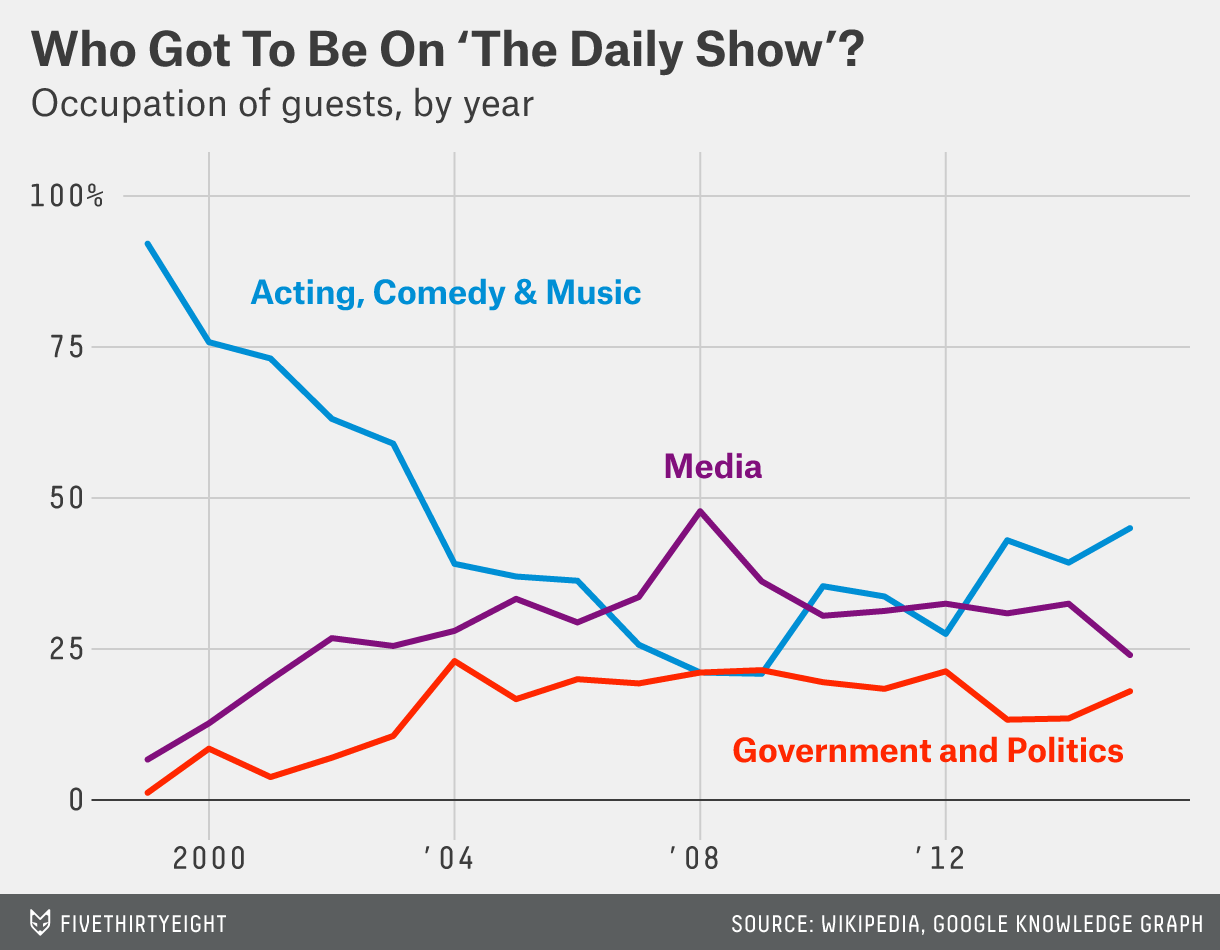

In [43]:
from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(url, width=500)
display(example)

**Hints:**
- You may want to use the crosstab you calculated in part 1!
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume altair would work too.
- Different visualization libraries have different expectations about how data is formatted, so you probably need to do some wrangling.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0 (` !pip install --upgrade seaborn`) and restart your runtime.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus, but it's _not_ required to pass the Sprint Challenge.






In [0]:
# import package
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


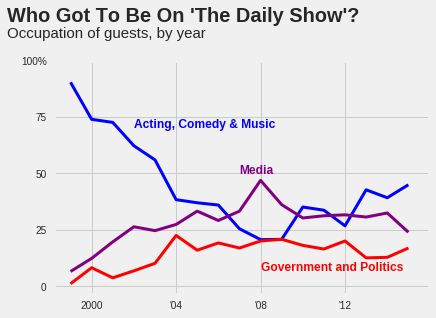

In [49]:
# Index(['Acting, Comedy & Music', 'Government and Politics', 'Media', 'Other'], dtype='object', name='Occupation')
# graph - datapoint
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
graph1 = ax.plot(year_occupation['Acting, Comedy & Music'],  color='blue', lw = 3) 
graph2 = ax.plot(year_occupation['Government and Politics'], color = 'red', lw = 3)
graph3 = ax.plot(year_occupation['Media'], color = 'purple', lw = 3)

# text - title label
ax.text(x = 1996, y = 1.17, s = "Who Got To Be On 'The Daily Show'?",
       fontweight = 'bold', fontsize = 20)
ax.text(x = 1996, y = 1.1, s = "Occupation of guests, by year",
       fontsize = 15)
# text - line label
ax.text(x = 2002, y = .7, s = 'Acting, Comedy & Music',
       fontweight = 'bold', color = 'blue' ,fontsize = 12)
ax.text(x = 2008, y = .07, s = 'Government and Politics',
       fontweight = 'bold', color = 'red' ,fontsize = 12)
ax.text(x = 2007, y = .5, s = 'Media',
       fontweight = 'bold', color = 'purple' ,fontsize = 12)
# text - axis label
ax.set(yticks = (0,0.25,0.5,0.75,1))
ax.set(yticklabels = ('0','25','50','75','100%'))
ax.set(xticks = (2000,2004,2008,2012,2016))
ax.set(xticklabels = ("2000","'04","'08","'12",''))

plt.show()

# Part 3 — Who were the top 10 guests on _The Daily Show_?

**Make a plot** that shows their names and number of appearances.

**Hint:** you can use the pandas `value_counts` method.

**Expectations:** This can be a simple, quick plot: exploratory, not explanatory. 

**Optional Bonus:** You can add titles and change aesthetics, but it's _not_ required to pass the Sprint Challenge.

In [51]:
# extract top 10 guests
top10 = df['Guest'].value_counts().head(10)
print(top10)

Fareed Zakaria    19
Denis Leary       17
Brian Williams    16
Paul Rudd         13
Ricky Gervais     13
Tom Brokaw        12
Bill O'Reilly     10
Will Ferrell      10
Richard Lewis     10
Reza Aslan        10
Name: Guest, dtype: int64


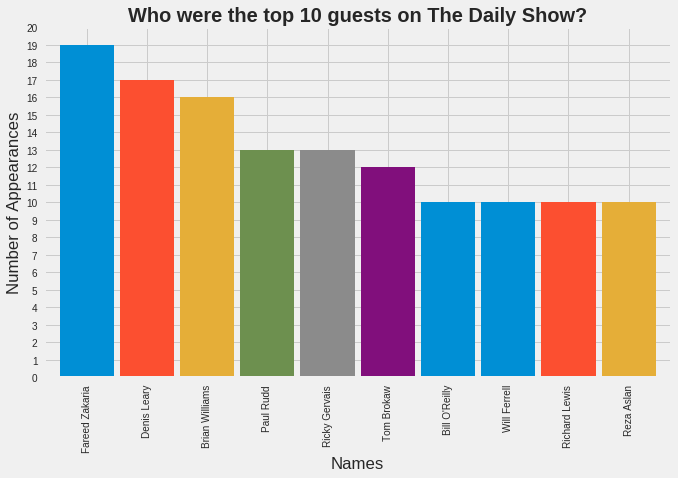

In [52]:
# graph - datapoint
fig,ax = plt.subplots(figsize=(10,6))
ax = top10.plot.bar(width=.9, legend=False)

# text - title and axis label
ax.set_title('Who were the top 10 guests on The Daily Show?', fontsize=20, fontweight='bold')
ax.set_xlabel('Names')
ax.set_ylabel('Number of Appearances')
ax.set(yticks=range(0,21,1));